In [72]:
#basic import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('students_mental_health_survey.csv')

In [3]:
df.head()

Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0   25            Others    Male  3.56             3                 3   
1   24       Engineering  Female  2.44             0                 3   
2   19          Business  Female  3.74             4                 0   
3   19  Computer Science    Male  3.65             2                 1   
4   18          Business    Male  3.40             3                 3   

   Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0              2          Good          Moderate         Good       Moderate   
1              0       Average               Low      Average            Low   
2              3          Good               Low      Average       Moderate   
3              0       Average               Low      Average       Moderate   
4              4          Good               Low      Average           High   

  Relationship_Status Substance_Use Counseling_Service_Use Family_History  \
0             Married         Never                  Never             No   
1              Single  Occasionally           Occasionally             No   
2   In a Relationship         Never           Occasionally             No   
3              Single           NaN                  Never             No   
4             Married         Never                  Never             No   

  Chronic_Illness  Financial_Stress Extracurricular_Involvement  \
0              No                 2                    Moderate   
1              No                 3                         Low   
2              No                 4                        High   
3              No                 4                    Moderate   
4             Yes                 0                        High   

   Semester_Credit_Load Residence_Type  
0                    17      On-Campus  
1                    27      On-Campus  
2                    15      On-Campus  
3                    20     Off-Campus  
4                    23      On-Campus

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [5]:
df.describe().T

count       mean       std    min    25%   50%   75%  \
Age                   7022.0  23.003418  3.853978  18.00  20.00  22.0  25.0   
CGPA                  7010.0   3.491270  0.287420   2.44   3.29   3.5   3.7   
Stress_Level          7022.0   2.427941  1.638408   0.00   1.00   2.0   4.0   
Depression_Score      7022.0   2.254486  1.625193   0.00   1.00   2.0   3.0   
Anxiety_Score         7022.0   2.300484  1.624305   0.00   1.00   2.0   4.0   
Financial_Stress      7022.0   2.453005  1.708995   0.00   1.00   2.0   4.0   
Semester_Credit_Load  7022.0  22.010538  4.358380  15.00  18.00  22.0  26.0   

                       max  
Age                   35.0  
CGPA                   4.0  
Stress_Level           5.0  
Depression_Score       5.0  
Anxiety_Score          5.0  
Financial_Stress       5.0  
Semester_Credit_Load  29.0

In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

In [9]:
df.dropna(inplace=True)

# Dataset contains a lot of categorical columns thus we'll be exploring categorical columns with respect to stress level,anxiety score and depression score

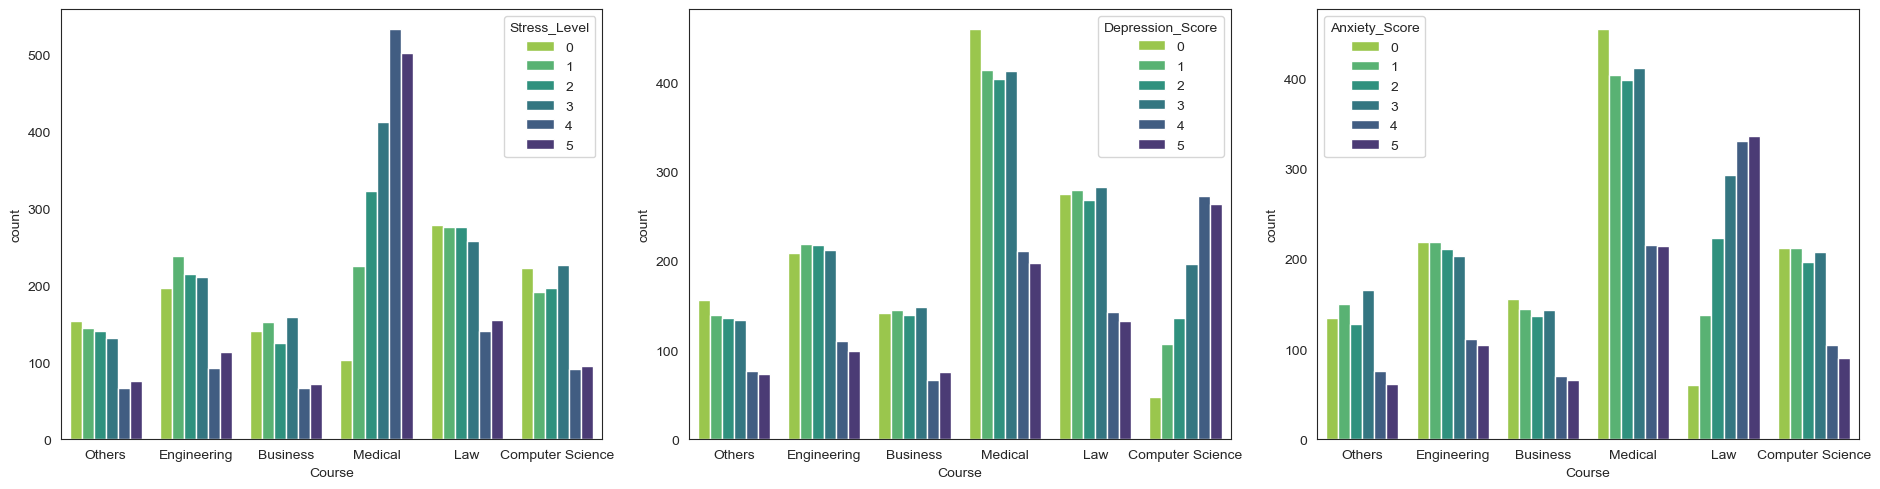

In [10]:
#course
%matplotlib inline
sns.set_style('white')
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,5))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Course',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()  
#stress level - medical course shows higher stress levels than ususal,all other moderate levels
#depression_score - computer science course shows higher depression score than usual,all other modeate leel
#anxiety_score - law students exibit higher anxiety score than others

In [11]:
df.groupby('Course')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()

Stress_Level  Depression_Score  Anxiety_Score
Course                                                         
Business              2.107692          2.106294       2.037762
Computer Science      2.054795          3.302348       2.048924
Engineering           2.097470          2.086223       2.074977
Law                   2.125272          2.100652       3.234613
Medical               3.217080          2.044370       2.081584
Others                2.060224          2.075630       2.114846

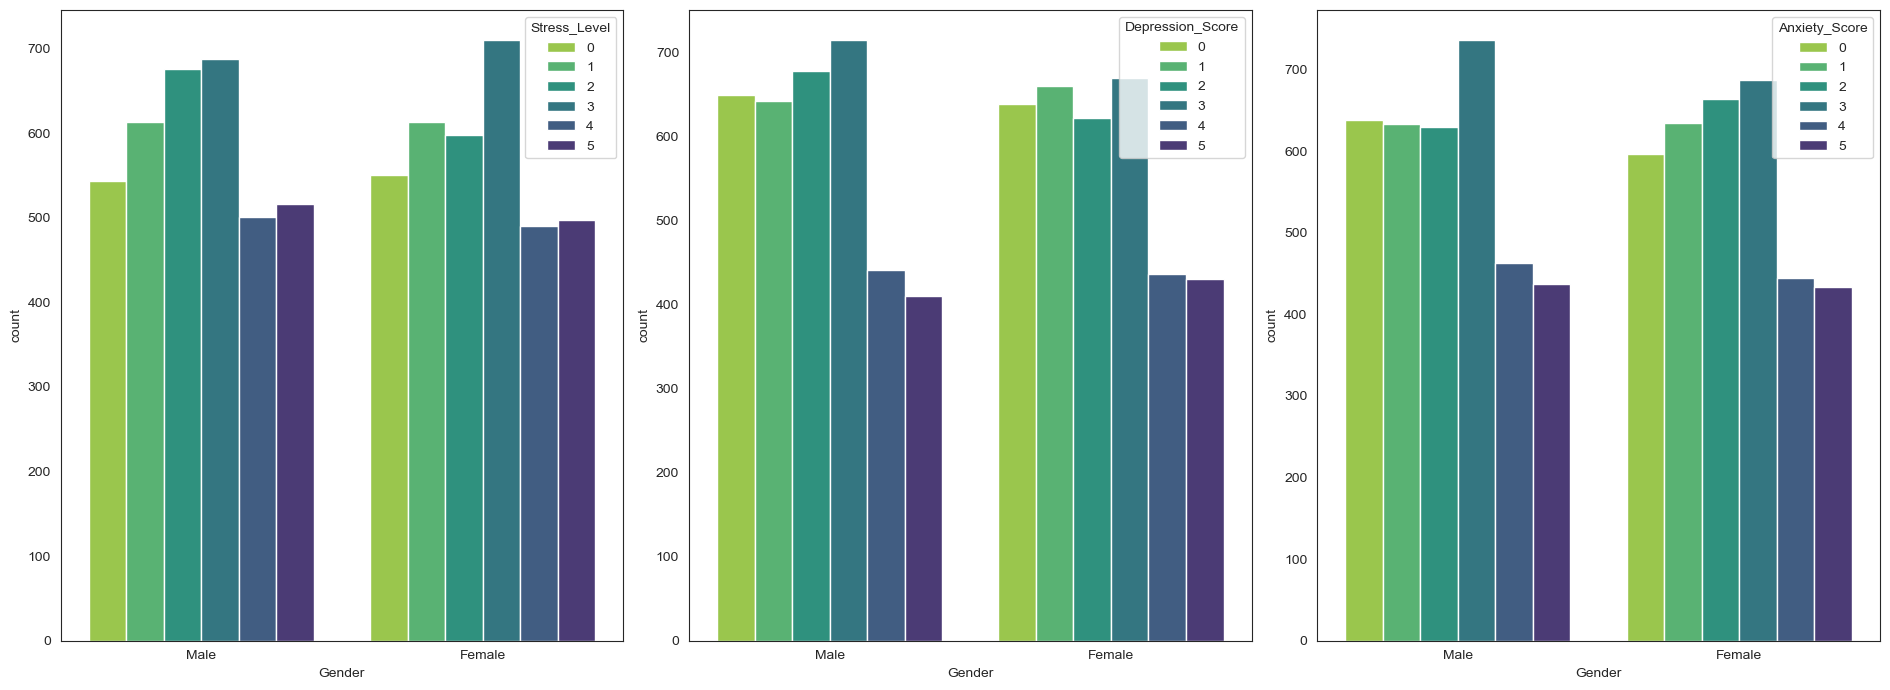

In [12]:
#Gender
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Gender',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout() 
# male and female exhibit similar score on all three metrics


In [13]:
df.groupby('Gender')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()

Stress_Level  Depression_Score  Anxiety_Score
Gender                                               
Female      2.423822          2.259902       2.303845
Male        2.434955          2.250566       2.300905

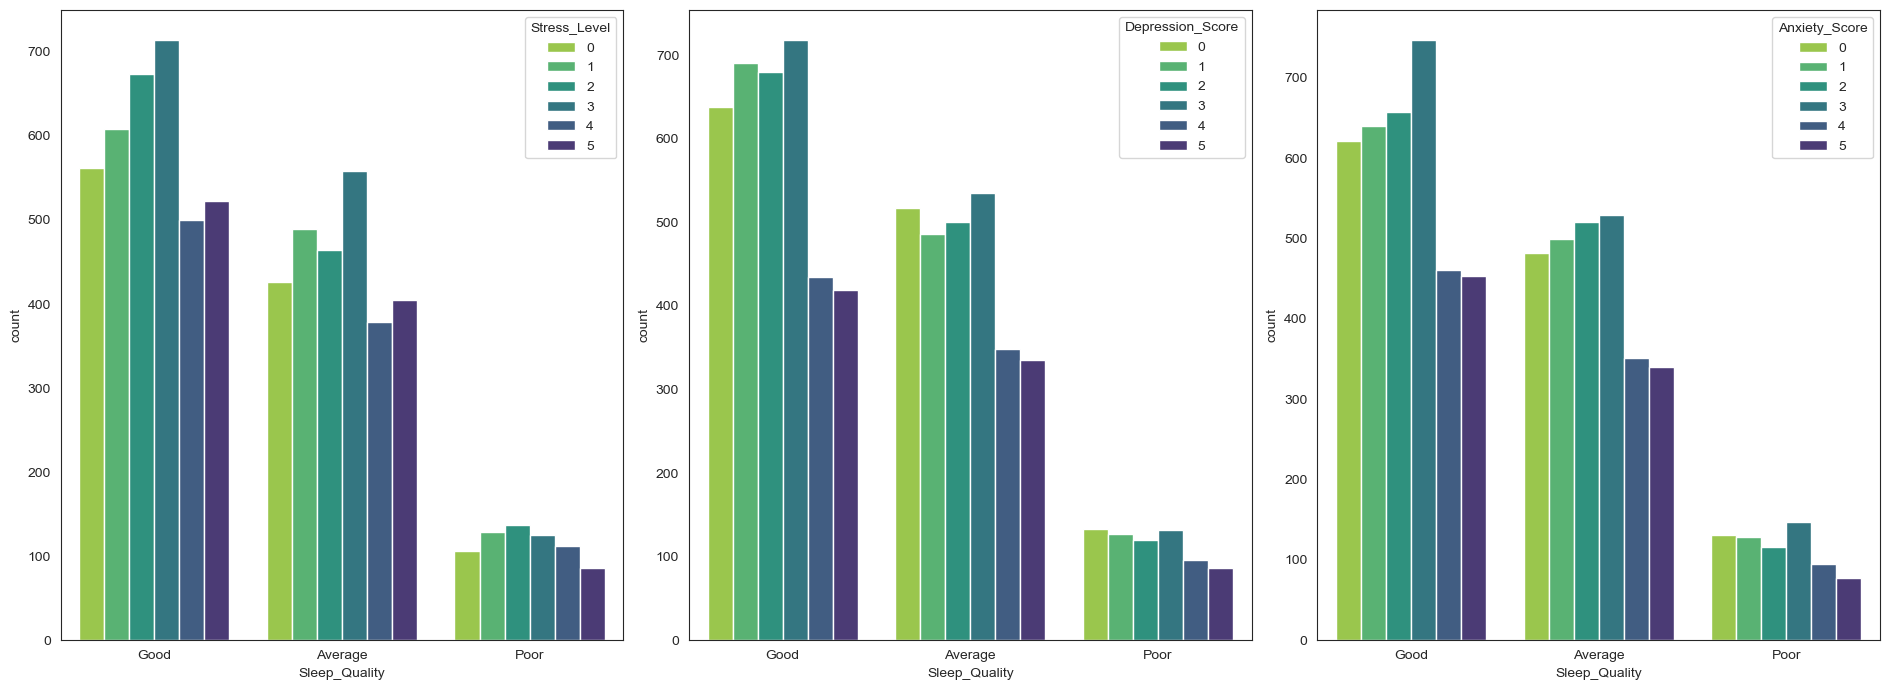

In [14]:
#sleep quality
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Sleep_Quality',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout() 

In [15]:
df.groupby('Sleep_Quality')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#no correlation betweeen mean scores and sleep quality

Stress_Level  Depression_Score  Anxiety_Score
Sleep_Quality                                               
Average            2.437339          2.263139       2.289599
Good               2.432523          2.245041       2.320201
Poor               2.382734          2.276259       2.260432

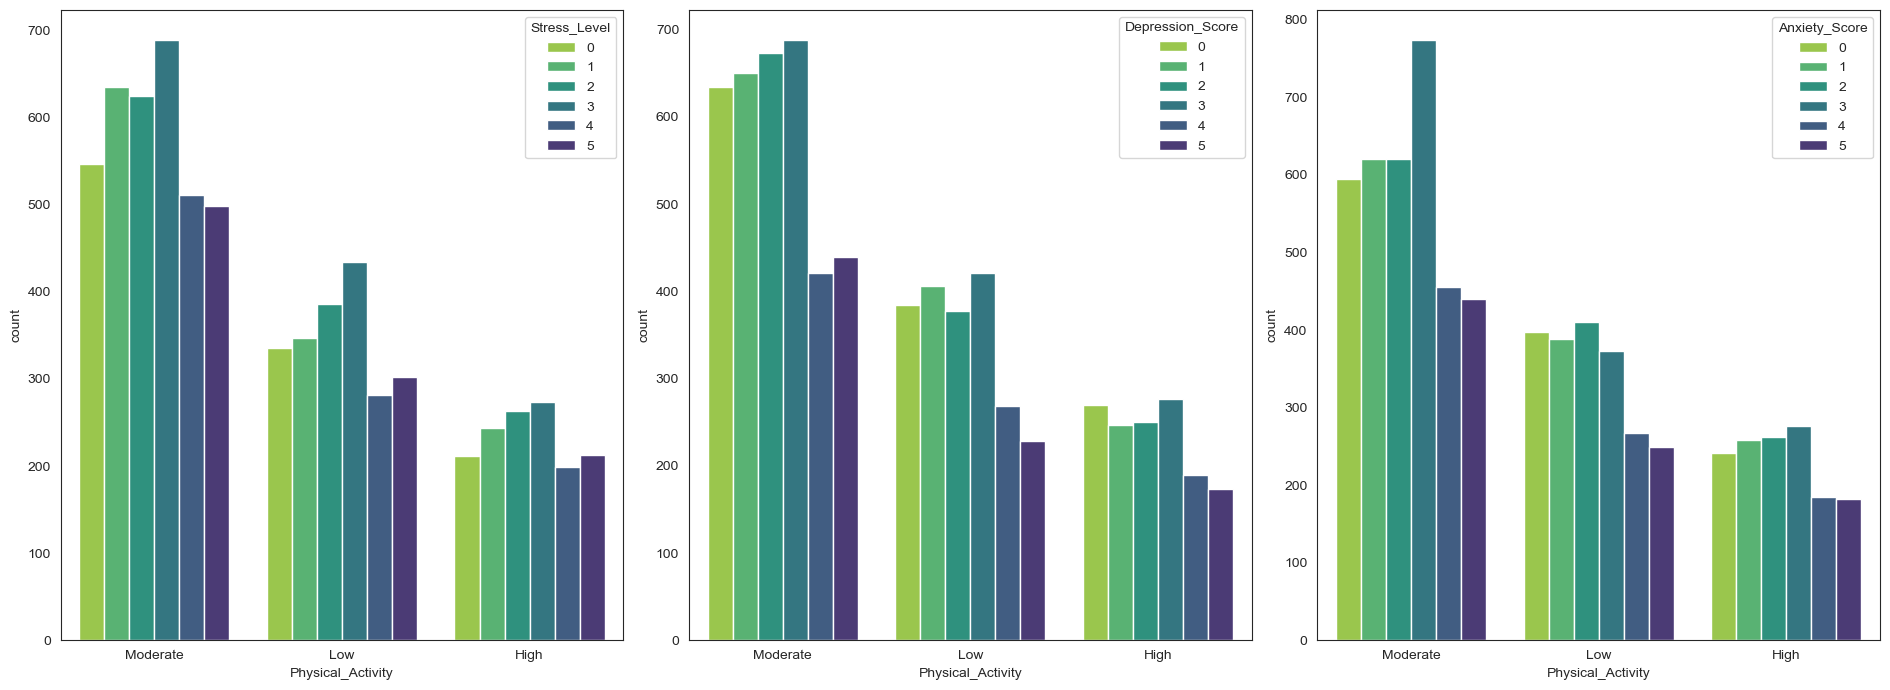

In [16]:
#physical activity
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Physical_Activity',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout() 

In [17]:
df.groupby('Physical_Activity')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#moderate or high physical activity leads to high anxiety level, otherwise no correlation

Stress_Level  Depression_Score  Anxiety_Score
Physical_Activity                                               
High                   2.457651          2.274733       2.320285
Low                    2.424460          2.225420       2.225899
Moderate               2.421113          2.265050       2.340656

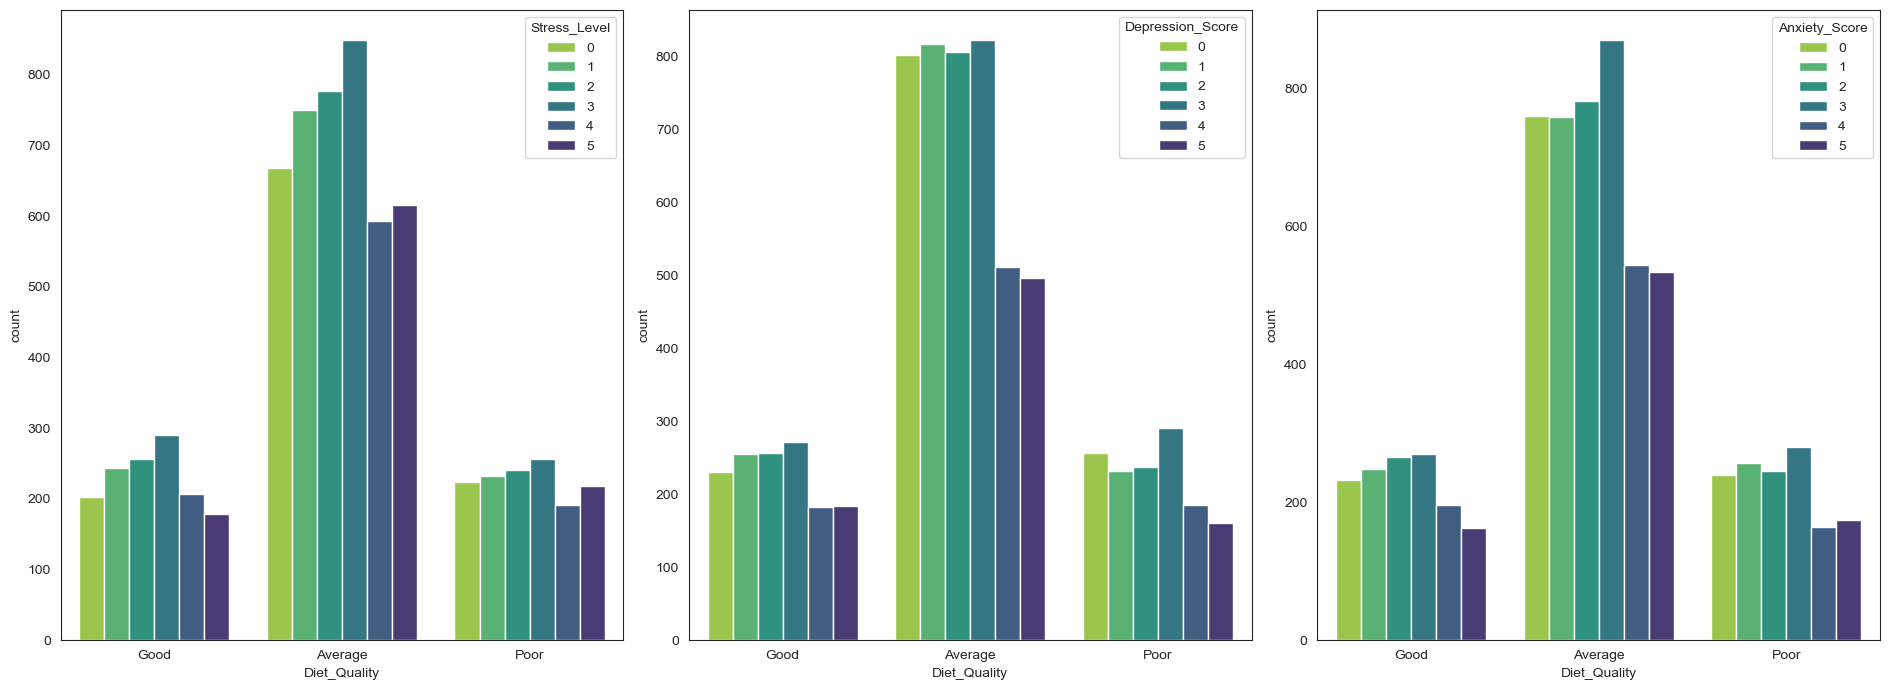

In [18]:
#diet quality
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Diet_Quality',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [19]:
df.groupby('Diet_Quality')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
# good diet leads to higher depression score, otherwise no extreme values

Stress_Level  Depression_Score  Anxiety_Score
Diet_Quality                                               
Average           2.422525          2.214437       2.301199
Good              2.430747          2.343002       2.318347
Poor              2.449743          2.293470       2.289802

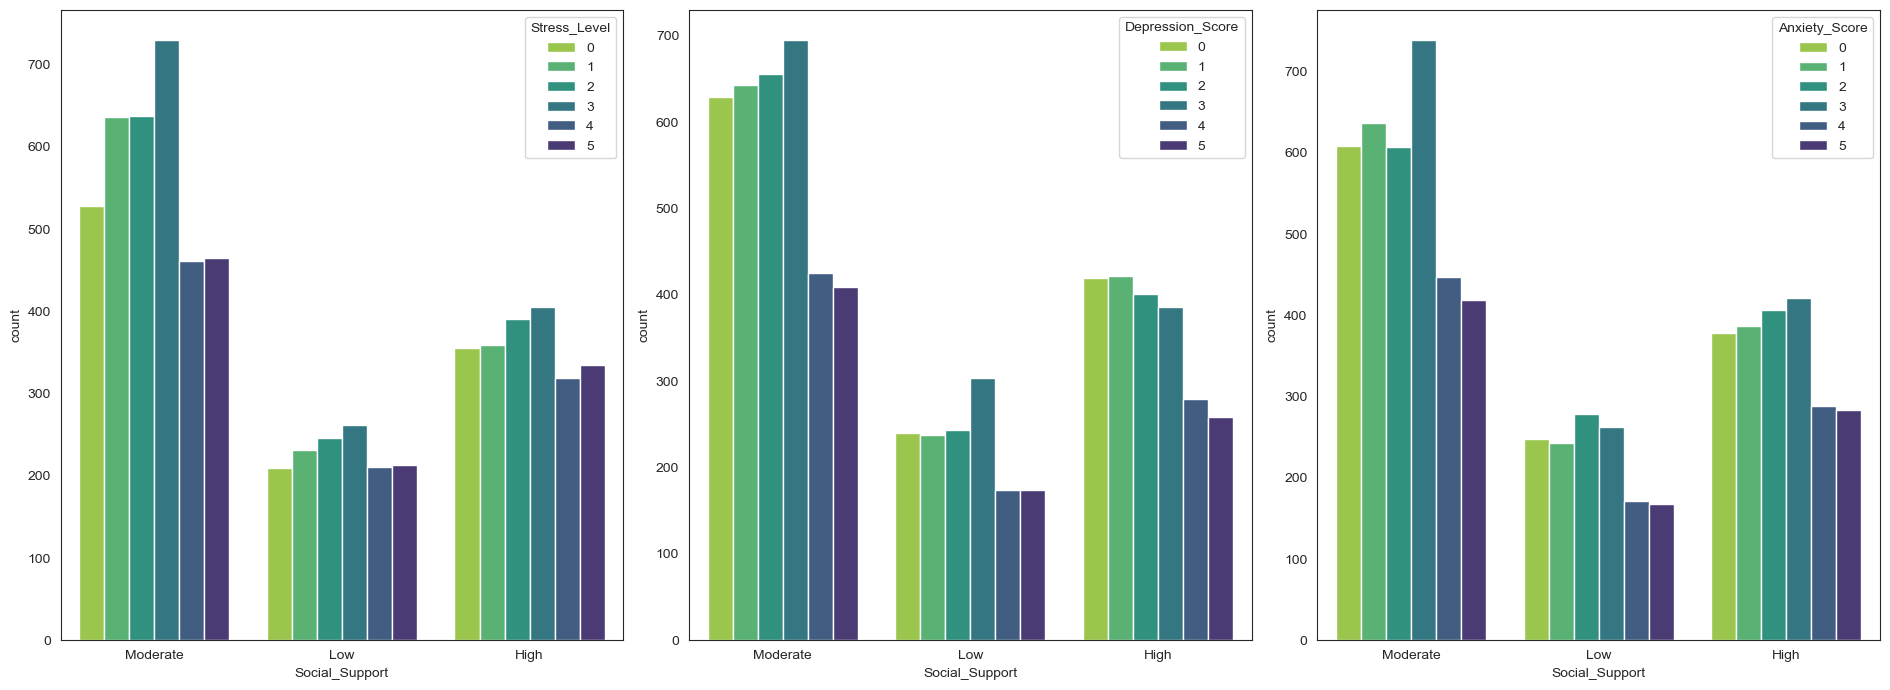

In [20]:
#social support
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Social_Support',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [21]:
df.groupby('Social_Support')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#low social support leads to higher stress and depression score , however high social support leads to higher anxiety score 

Stress_Level  Depression_Score  Anxiety_Score
Social_Support                                               
High                2.451270          2.211547       2.326097
Low                 2.489439          2.332119       2.270940
Moderate            2.391958          2.251953       2.299971

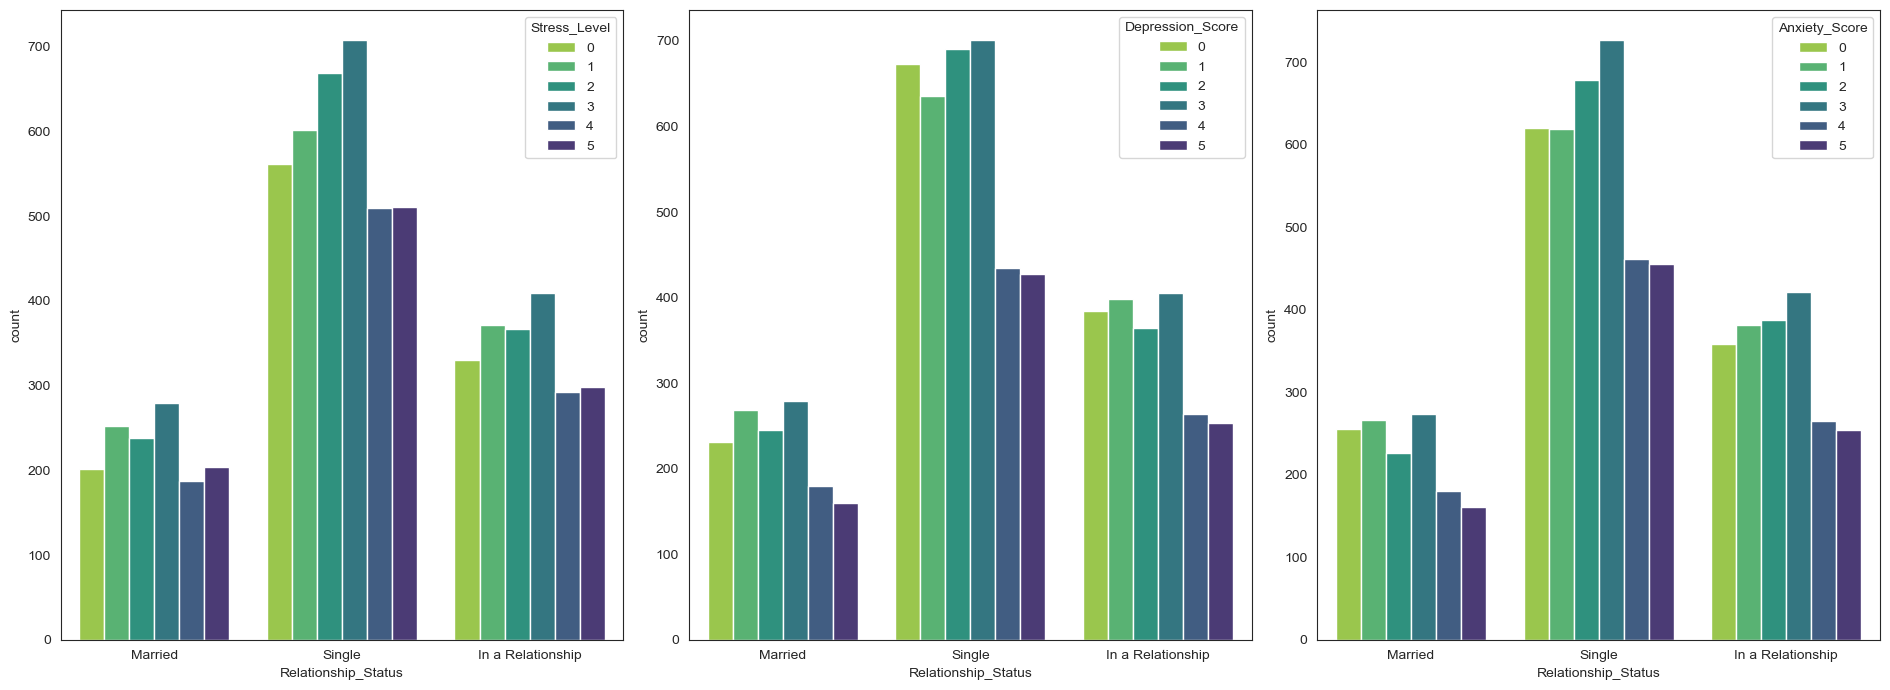

In [22]:
#Relationship_Status
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Relationship_Status',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [23]:
df.groupby('Relationship_Status')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#married exhibit higher stress and depression while single exhibit higher anxiety

Stress_Level  Depression_Score  Anxiety_Score
Relationship_Status                                               
In a Relationship        2.414210          2.254229       2.297728
Married                  2.448680          2.284457       2.250000
Single                   2.430938          2.244526       2.325098

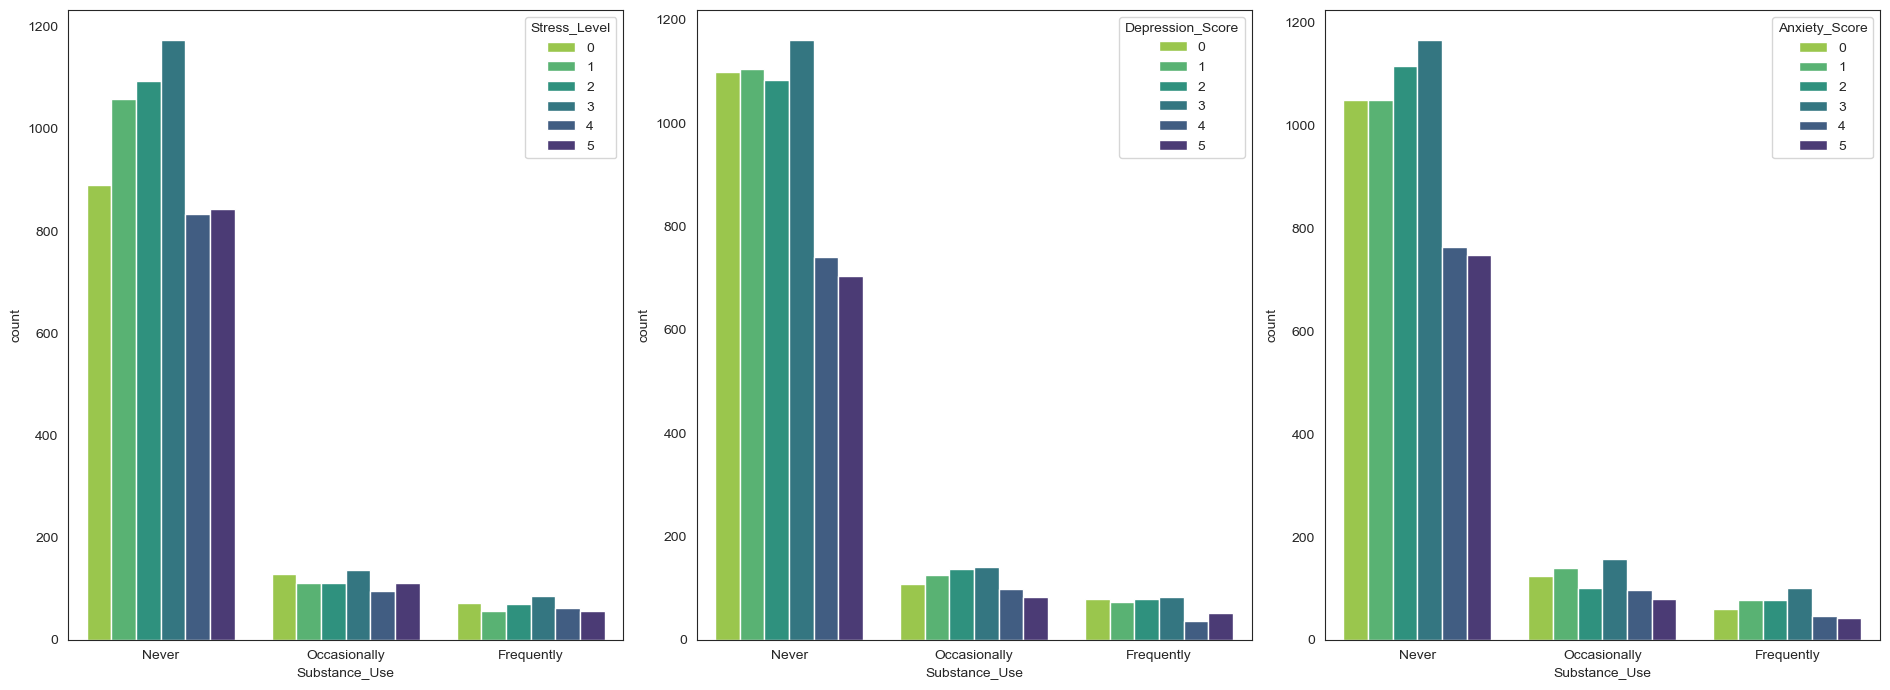

In [24]:
#Substance_Use
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Substance_Use',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [25]:
df.groupby('Substance_Use')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#occasional substance leads to higher depression score otherwise no correlation

Stress_Level  Depression_Score  Anxiety_Score
Substance_Use                                               
Frequently         2.443069          2.210396       2.304455
Never              2.429420          2.246522       2.304208
Occasionally       2.421808          2.354376       2.285509

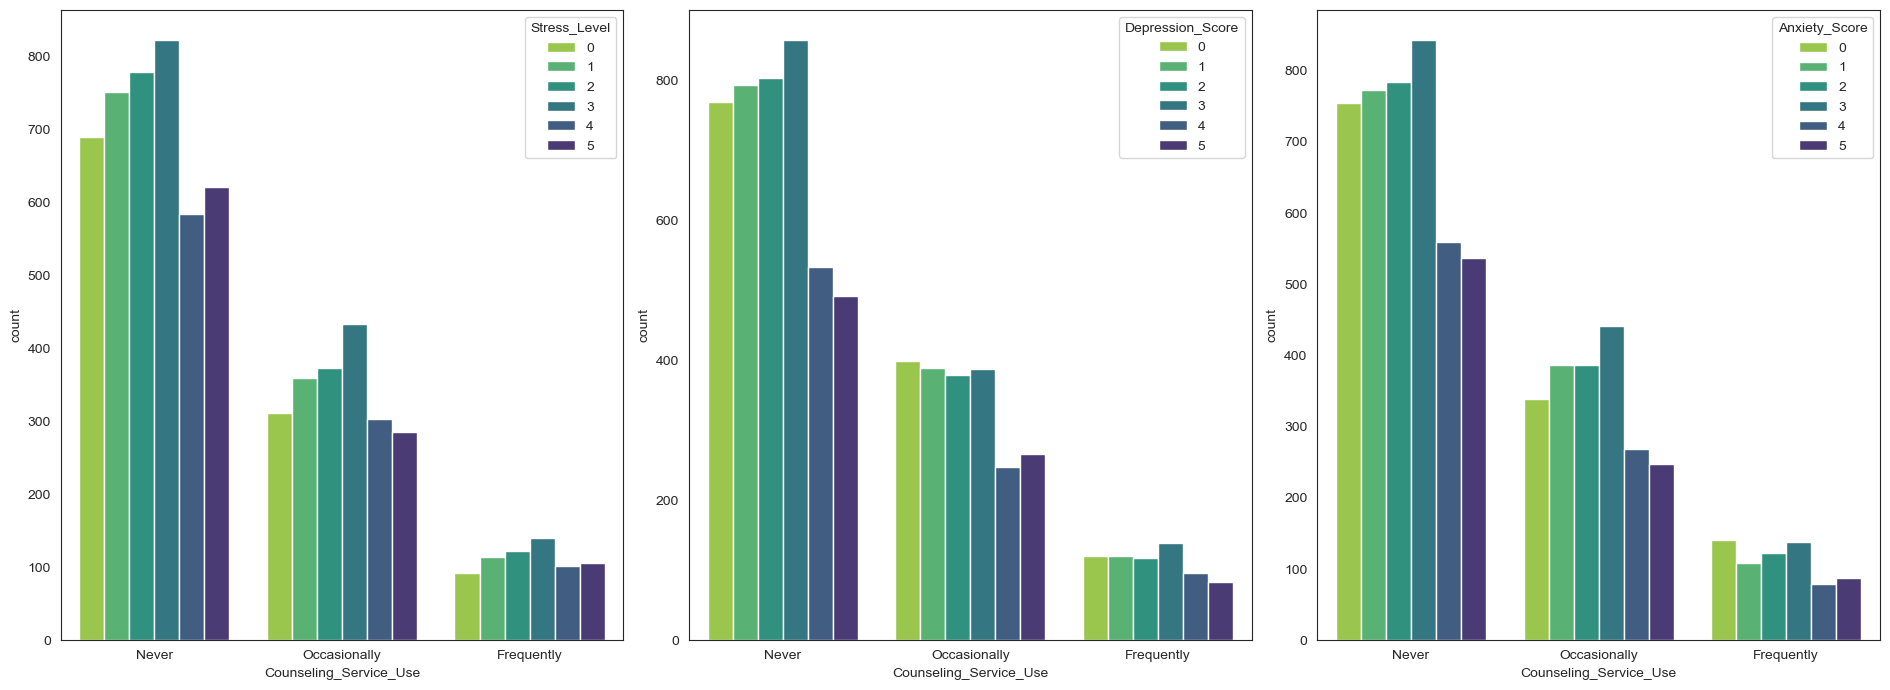

In [26]:
#Counseling_Service_Use
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Counseling_Service_Use',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [27]:
df.groupby('Counseling_Service_Use')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#not using counseling service leads to lower stress, Frequent leads to higher depression score and Frequent use leads to lowered anxiety

Stress_Level  Depression_Score  Anxiety_Score
Counseling_Service_Use                                               
Frequently                  2.538462          2.325444       2.247041
Never                       2.405647          2.251765       2.303765
Occasionally                2.442726          2.239246       2.317545

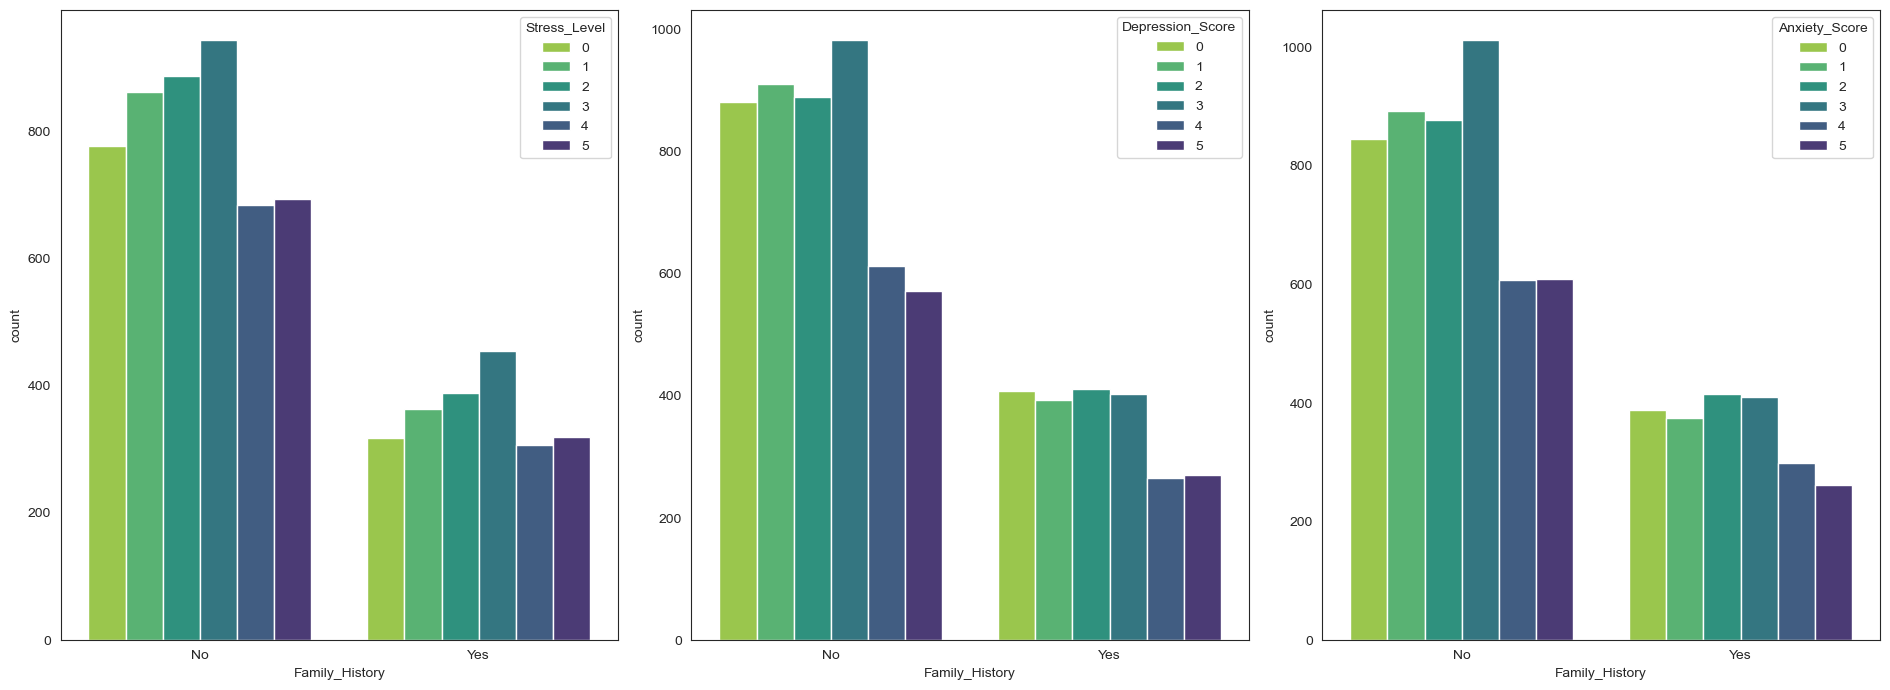

In [28]:
#family history
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Family_History',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [29]:
df.groupby('Family_History')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#having a of stress leads to higher stress_levels, otherwise similar scores with or without family history

Stress_Level  Depression_Score  Anxiety_Score
Family_History                                               
No                  2.407927          2.257845       2.304088
Yes                 2.477917          2.249186       2.298466

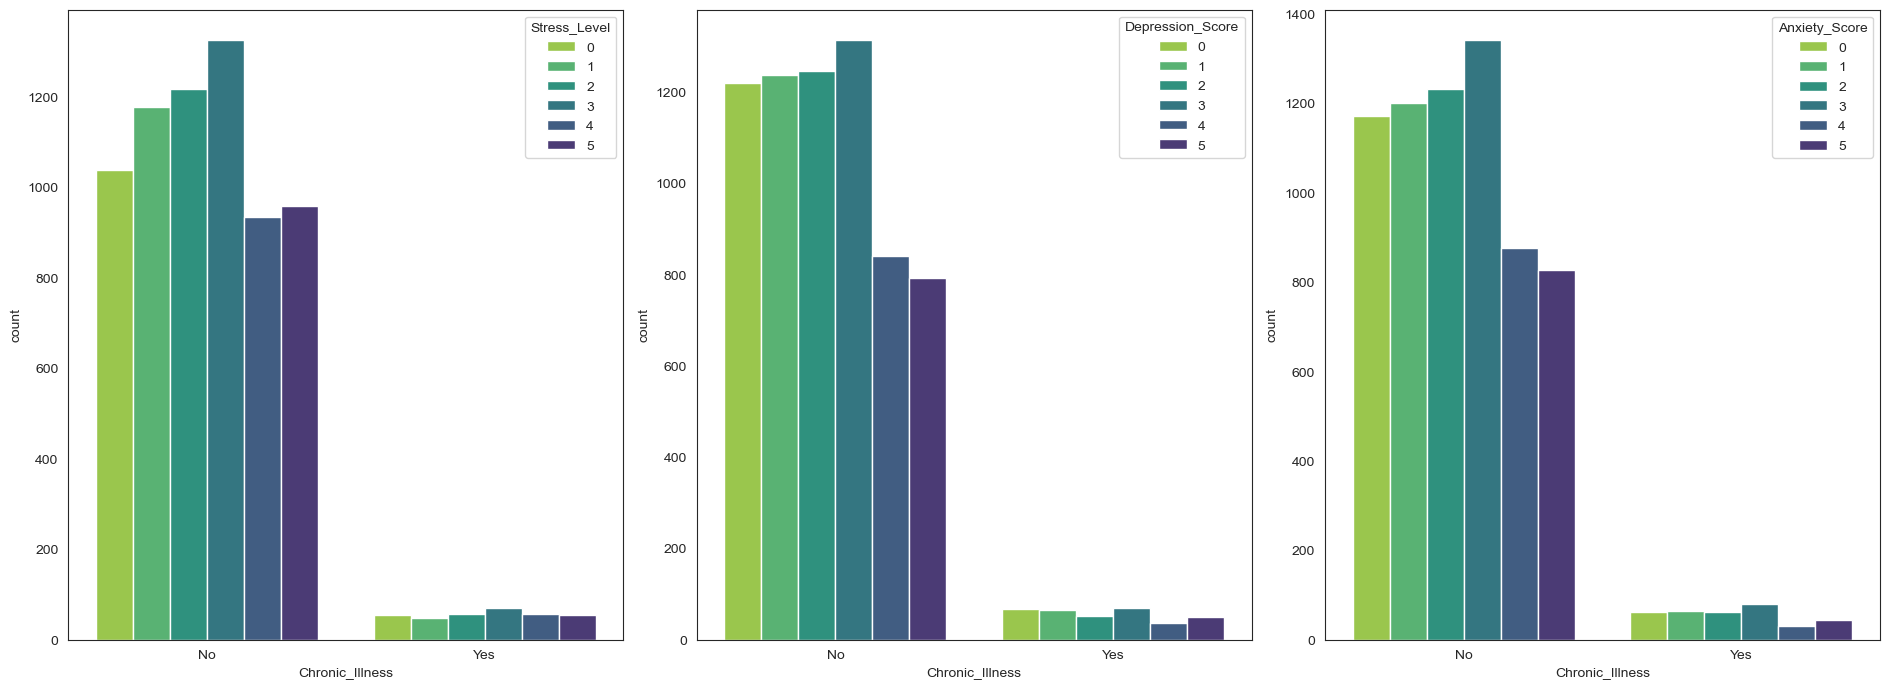

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Chronic_Illness',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

In [31]:
df.groupby('Chronic_Illness')[['Stress_Level','Depression_Score','Anxiety_Score']].mean()
#chronic ilness leads to highers stress levels

Stress_Level  Depression_Score  Anxiety_Score
Chronic_Illness                                               
No                   2.422730          2.254961       2.305773
Yes                  2.559767          2.259475       2.236152

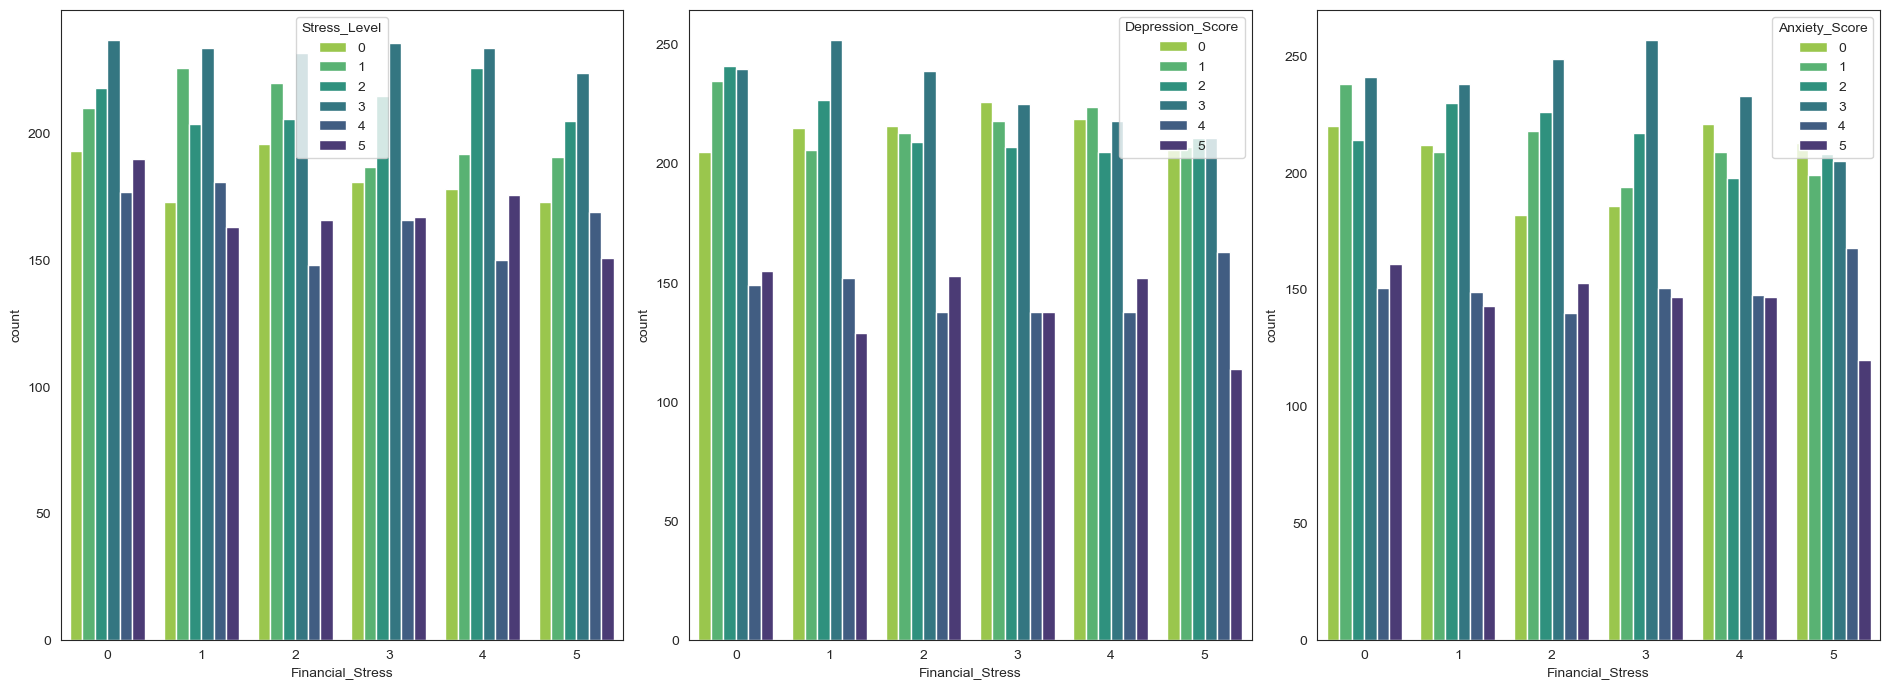

In [32]:
#Financial_Stress
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
hues = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,hue in enumerate(hues):
    ax = axes[i]
    sns.countplot(x='Financial_Stress',data=df,hue=hue,palette='viridis_r',ax=ax)
plt.tight_layout()

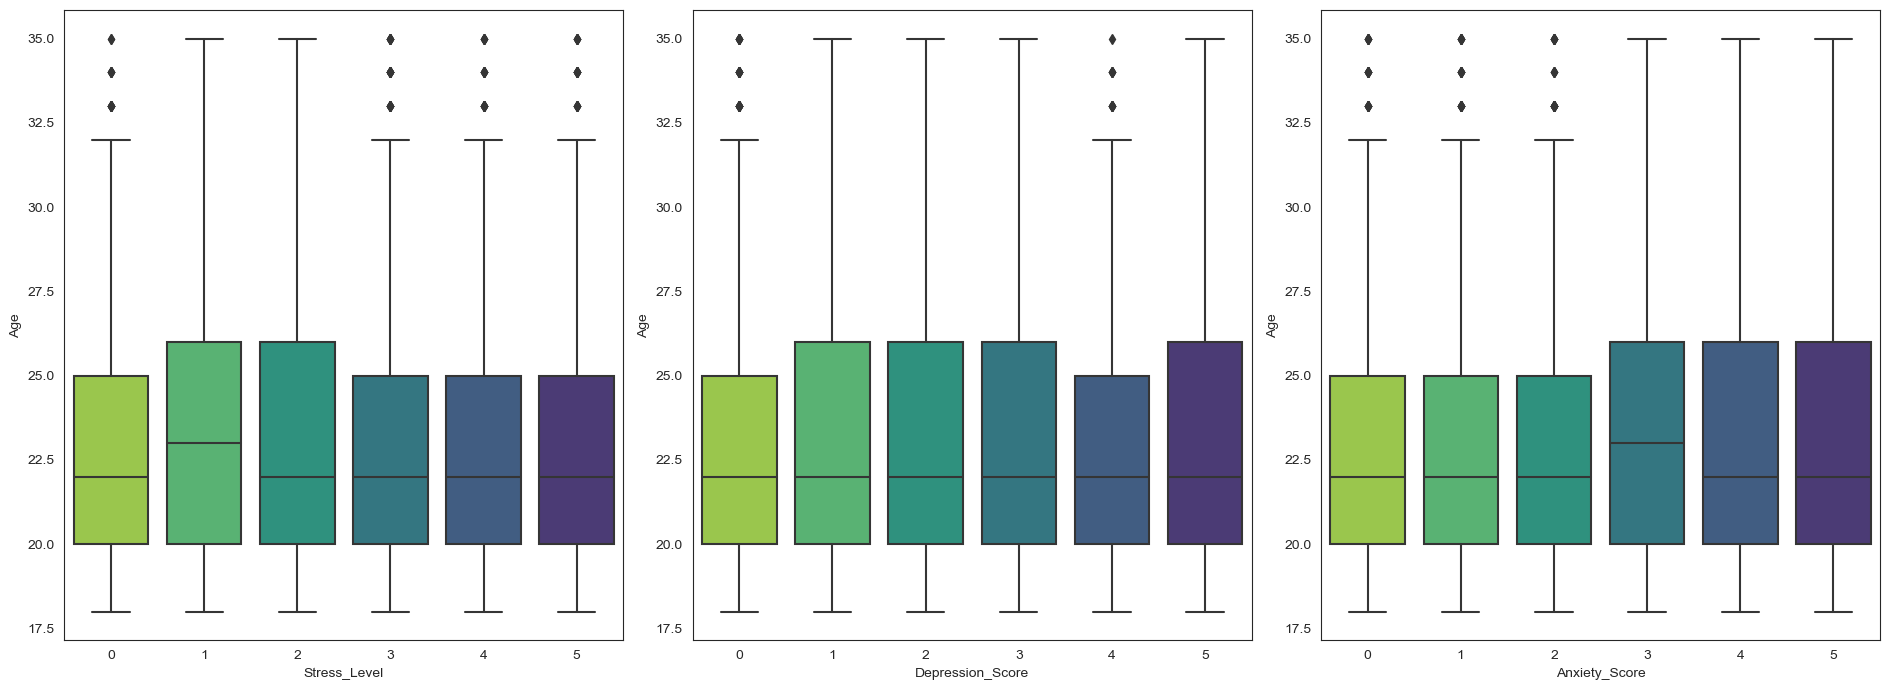

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
xs = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,x in enumerate(xs):
    ax = axes[i]
    sns.boxplot(y='Age',data=df,x=x,palette='viridis_r',ax=ax)
plt.tight_layout()

In [34]:
#checking correlation of age with all 3 scores
df[['Stress_Level','Depression_Score','Anxiety_Score']].corrwith(df['Age'])
#no real correlation between age and any of the three scores

Stress_Level       -0.019584
Depression_Score    0.001292
Anxiety_Score       0.007497
dtype: float64

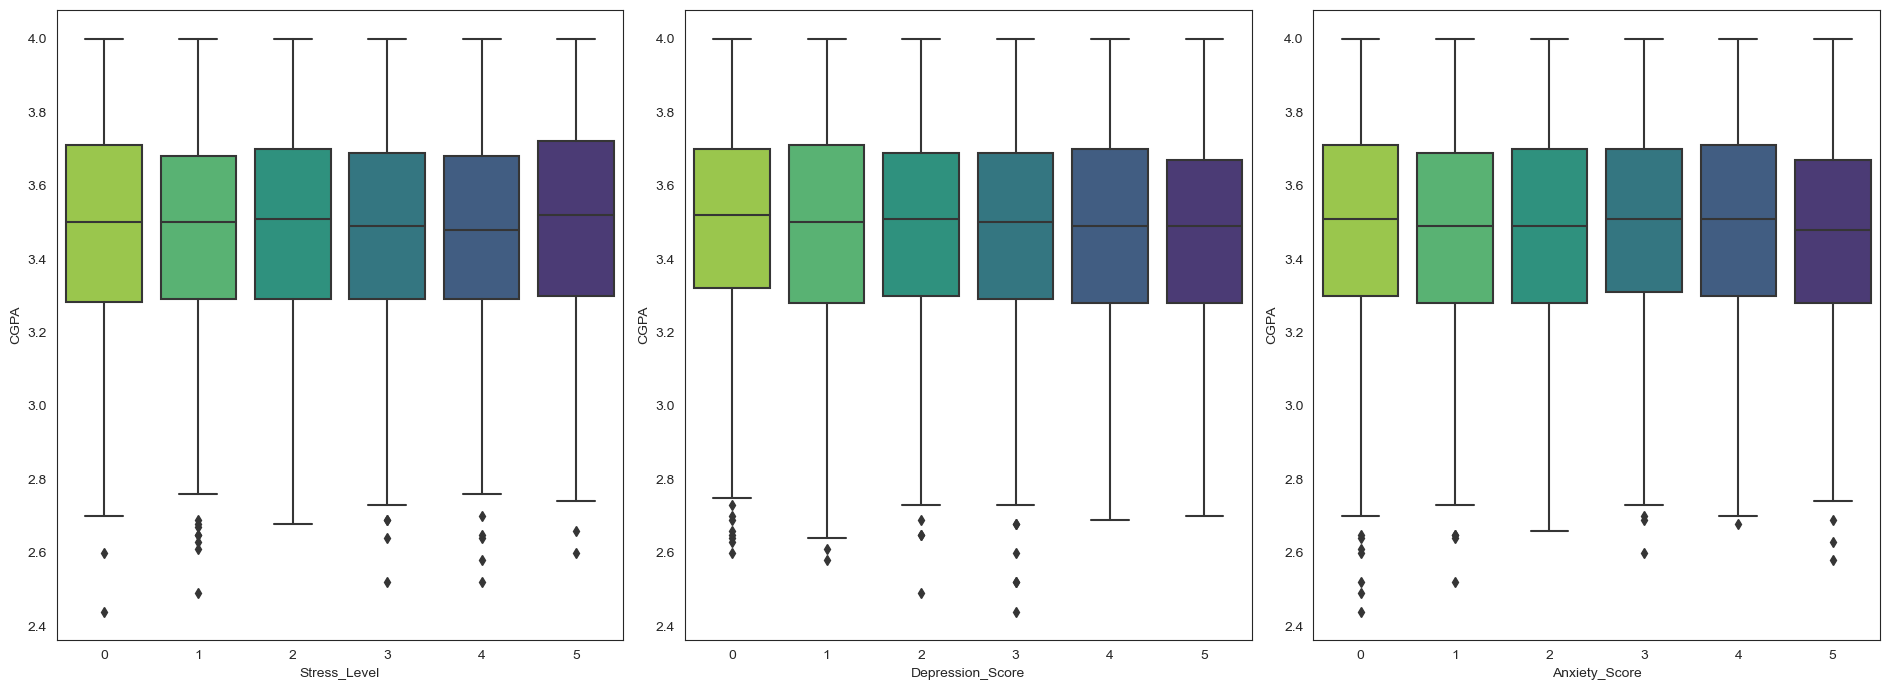

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
xs = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,x in enumerate(xs):
    ax = axes[i]
    sns.boxplot(y='CGPA',data=df,x=x,palette='viridis_r',ax=ax)
plt.tight_layout()

In [36]:
df[['Stress_Level','Depression_Score','Anxiety_Score']].corrwith(df['CGPA'])
#no strong correlations of cgpa and all three scores

Stress_Level        0.005239
Depression_Score   -0.022324
Anxiety_Score       0.003571
dtype: float64

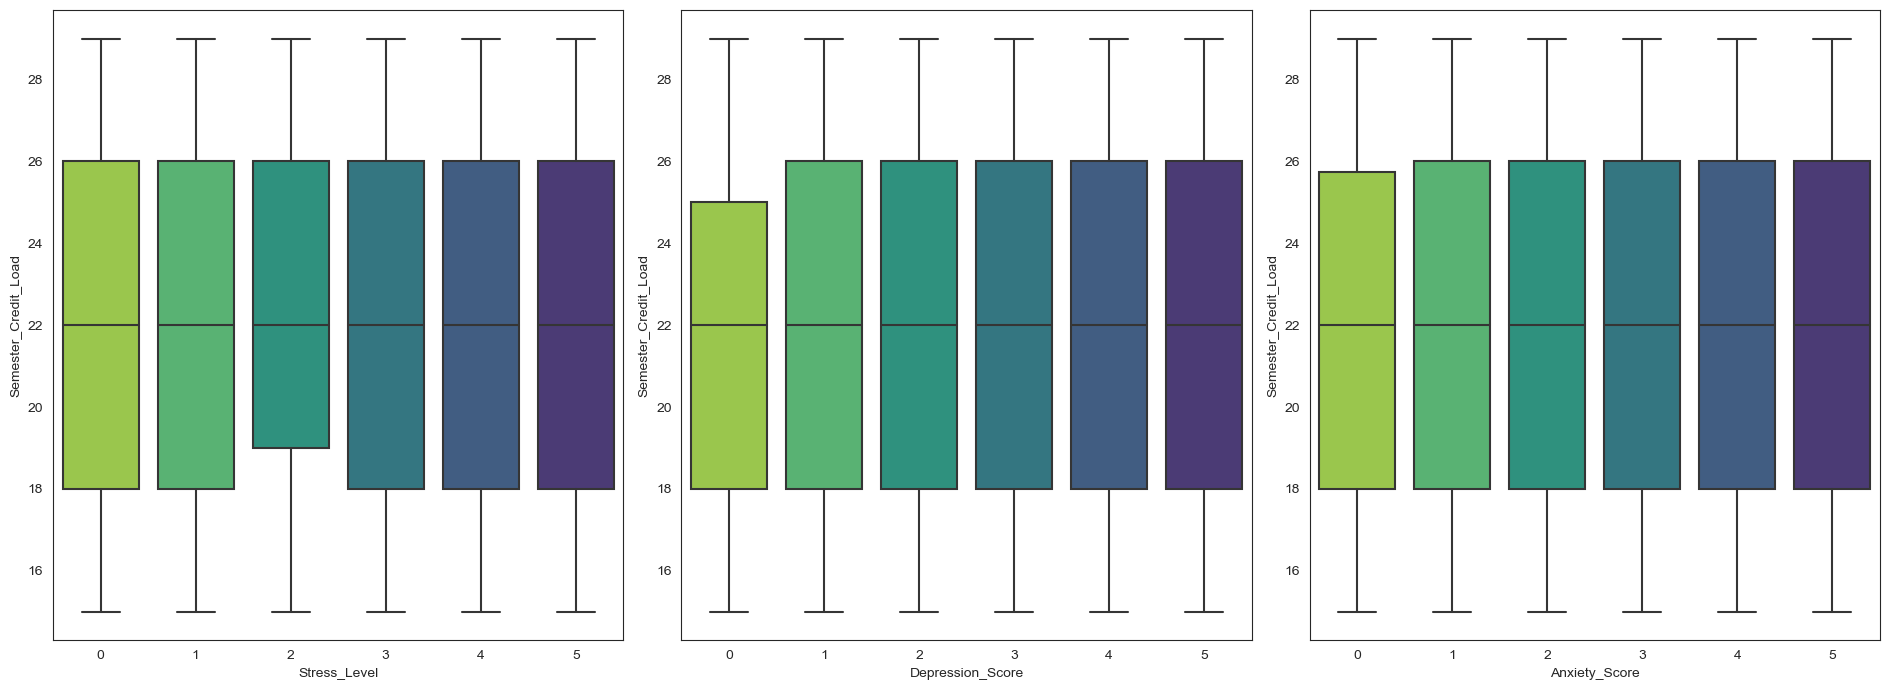

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(19,7))
xs = ['Stress_Level','Depression_Score','Anxiety_Score']
for i,x in enumerate(xs):
    ax = axes[i]
    sns.boxplot(y='Semester_Credit_Load',data=df,x=x,palette='viridis_r',ax=ax)
plt.tight_layout()

In [38]:
df[['Stress_Level','Depression_Score','Anxiety_Score']].corrwith(df['Semester_Credit_Load'])

Stress_Level       -0.005683
Depression_Score    0.023133
Anxiety_Score       0.012086
dtype: float64

# preprocessing

### Manually mapping ordinal columns

In [48]:
label_map = {'Good':2,'Average':1,'Poor':0}
df['Sleep_Quality'] = df['Sleep_Quality'].replace(label_map)
df['Diet_Quality'] = df['Diet_Quality'].replace(label_map)

In [63]:
#slightly modifying mapping for each column
label_map = {'High':2,'Moderate':1,'Low':0}
df['Physical_Activity'] = df['Physical_Activity'].replace(label_map)
df['Social_Support'] = df['Social_Support'].replace(label_map)
df['Extracurricular_Involvement'] = df['Extracurricular_Involvement'].replace(label_map)

In [59]:
label_map = {'Frequently':2,'Occasionally':1,'Never':0}
df['Substance_Use'] = df['Substance_Use'].replace(label_map)
df['Counseling_Service_Use'] = df['Counseling_Service_Use'].replace(label_map)

### one hot encoding others

In [66]:
cat_cols = ['Course', 'Gender','Relationship_Status','Family_History','Chronic_Illness','Residence_Type']

In [67]:
df = pd.get_dummies(df,cat_cols,drop_first=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 0 to 7020
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   CGPA                         6995 non-null   float64
 2   Stress_Level                 6995 non-null   int64  
 3   Depression_Score             6995 non-null   int64  
 4   Anxiety_Score                6995 non-null   int64  
 5   Sleep_Quality                6995 non-null   int64  
 6   Physical_Activity            6995 non-null   int64  
 7   Diet_Quality                 6995 non-null   int64  
 8   Social_Support               6995 non-null   int64  
 9   Substance_Use                6995 non-null   int64  
 10  Counseling_Service_Use       6995 non-null   int64  
 11  Financial_Stress             6995 non-null   int64  
 12  Extracurricular_Involvement  6995 non-null   int64  
 13  Semester_Credit_Load   

# First approach-
### Predicting Stress levels of student basd on features when Depression and anxiety scores are known

In [77]:
#binning 6 scores f stress into 3 labels
stress_map = {0:'Low',1:'Low',2:'Moderate',3:'Moderate',4:'High',5:'High'}
df['Stress_Level'] = df['Stress_Level'].replace(stress_map)

In [79]:
X_stress = df.drop("Stress_Level",axis=1)
y_stress = df['Stress_Level']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_stress,y_stress,test_size=0.3,stratify=y_stress)

In [81]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print("DTREE")
print(classification_report(y_test,pred_dtree))

DTREE
              precision    recall  f1-score   support

        High       0.36      0.36      0.36       601
         Low       0.37      0.37      0.37       696
    Moderate       0.41      0.40      0.40       802

    accuracy                           0.38      2099
   macro avg       0.38      0.38      0.38      2099
weighted avg       0.38      0.38      0.38      2099



In [83]:
#hypertuning
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid for RandomizedSearchCV
random_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['sqrt', 'log2', None]
}
rand_grid = RandomizedSearchCV(dtree,random_param_grid,n_iter=75,verbose=3,)
rand_grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.430 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.436 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.424 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.433 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.446 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.421 total time=   0.0s
[CV 2/5] END crit

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.425 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.436 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.394 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.379 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.379 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.366 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_sample

[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.386 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.426 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.389 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.430 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.415 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.434 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3

[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.442 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.417 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.423 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.433 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.454 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.370 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.370 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.388 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.367 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.379 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.392 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.382 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_sample

[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.384 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.366 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.388 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.399 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.411 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.413 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, s

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=75,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [84]:
pred_rand_dtree = rand_grid.predict(X_test)
print(classification_report(y_test,pred_rand_dtree))

              precision    recall  f1-score   support

        High       0.47      0.42      0.45       601
         Low       0.39      0.41      0.40       696
    Moderate       0.39      0.40      0.40       802

    accuracy                           0.41      2099
   macro avg       0.42      0.41      0.41      2099
weighted avg       0.41      0.41      0.41      2099



In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print("RFC")
print(classification_report(y_test,pred_rfc))

RFC
              precision    recall  f1-score   support

        High       0.47      0.40      0.43       601
         Low       0.39      0.46      0.42       696
    Moderate       0.39      0.37      0.38       802

    accuracy                           0.41      2099
   macro avg       0.41      0.41      0.41      2099
weighted avg       0.41      0.41      0.41      2099



In [86]:
from sklearn.model_selection import RandomizedSearchCV
random_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   6.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  10.5s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   8.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  15.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  16.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total t

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   4.0s
[CV] END bootstrap=False, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   5.7s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   8.0s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  18.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  16.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth=70, min_sample

[CV] END bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   3.6s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.5s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   6.4s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=  19.3s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   6.8s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   7.7s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=  13.4s
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  15.9s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   3.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  12.7s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=50, min_samples_

[CV] END bootstrap=False, max_depth=50, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  15.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.8s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=  16.9s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  16.4s
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   9.7s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  14.9s
[CV] END bootstrap=False, max_depth=30, min_sampl

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   8.8s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  14.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   8.8s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  11.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=80, min_samples_l

In [87]:
pred_rfc_random = rfc_random.predict(X_test)
print(classification_report(y_test,pred_rfc_random))

              precision    recall  f1-score   support

        High       0.48      0.47      0.48       601
         Low       0.39      0.45      0.42       696
    Moderate       0.38      0.33      0.36       802

    accuracy                           0.41      2099
   macro avg       0.42      0.42      0.42      2099
weighted avg       0.41      0.41      0.41      2099

